<h1 align="center">Volume 1: Visualizing Complex-valued Functions.</h1>

    Caelan Osman
    Math 347 Sec. 2
    March 1, 2021

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
plt.rcParams["figure.dpi"] = 300     # Raise figure quality.

### Problem 1
- Implement `plot_complex()`.
- Plot $f(z) = z$ on $\{x + yi \mid x,y \in [-1,1]\}$.
- Plot $f(z) = \sqrt{z^2 + 1}$ on $\{x + iy \mid x,y \in [-3,3]\}$.

In [3]:
# Problem 1
def plot_complex(f, window=[-1, 1, -1, 1], res=400, title=""):
    """Visualize the complex-valued function f:C->C on the (res x res) domain
    {a + bi | a in [r_min, r_max], b in [i_min, i_max]} by plotting the
    argument of f(z) and the magnitude of f(z) in separate subplots.
    
    Parameters:
        f (func): A function that accepts and returns arrays with complex entries.
        window ([r_min, r_max, i_min, i_max]): The real and imaginary domain bounds.
        res (int): The plot resolution. The domain should be res x res.
        title (str): A label for the function to set as the figure title.
            Use r"$<latex code>$" for pretty printing. For example, for the function
            f = lambda z: z**2 - np.sqrt(z), use title=r"$f(z) = z^2 - \sqrt{z}$".
    """
    #get x values
    x = np.linspace(window[0], window[1], res)
    #get y values
    y = np.linspace(window[2], window[3], res)
    #create grid and use those to creat complex numbers
    X, Y = np.meshgrid(x, y)
    Z = X + 1j * Y
    #get radiius and angle values of f(Z)
    r_vals = np.abs(f(Z))
    theta_vals = np.angle(f(Z))
    #create figure and sublots
    fig, axs = plt.subplots(1, 2)
    ax = axs[0]
    #plot angle with twilight map
    ax.pcolormesh(X, Y, theta_vals, vmin = -np.pi, vmax=np.pi, cmap='twilight')
    ax.set_title('arg(f(Z))')
    ax.set_aspect('equal')
    ax = axs[1]
    #plot r values with viridis color map
    ax.pcolormesh(X, Y, r_vals, norm=LogNorm(), cmap = "viridis")
    ax.set_title('|f(Z)|')
    ax.set_aspect('equal')
    #set overall title for figure
    plt.suptitle(title)
    #show
    plt.show()
    

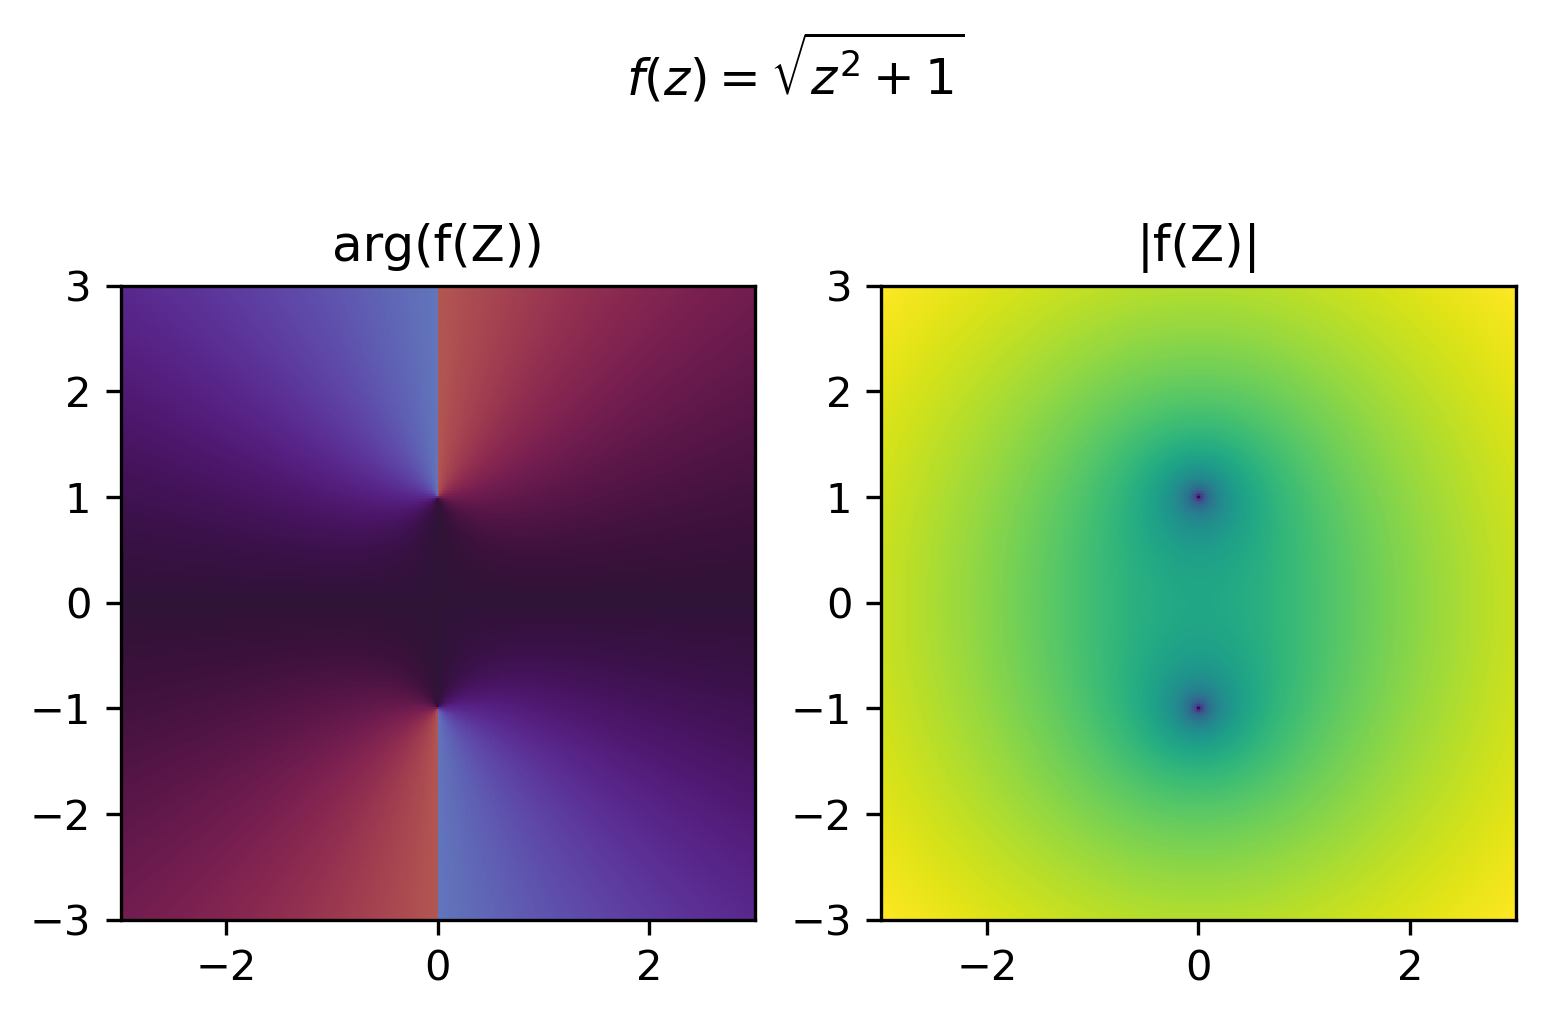

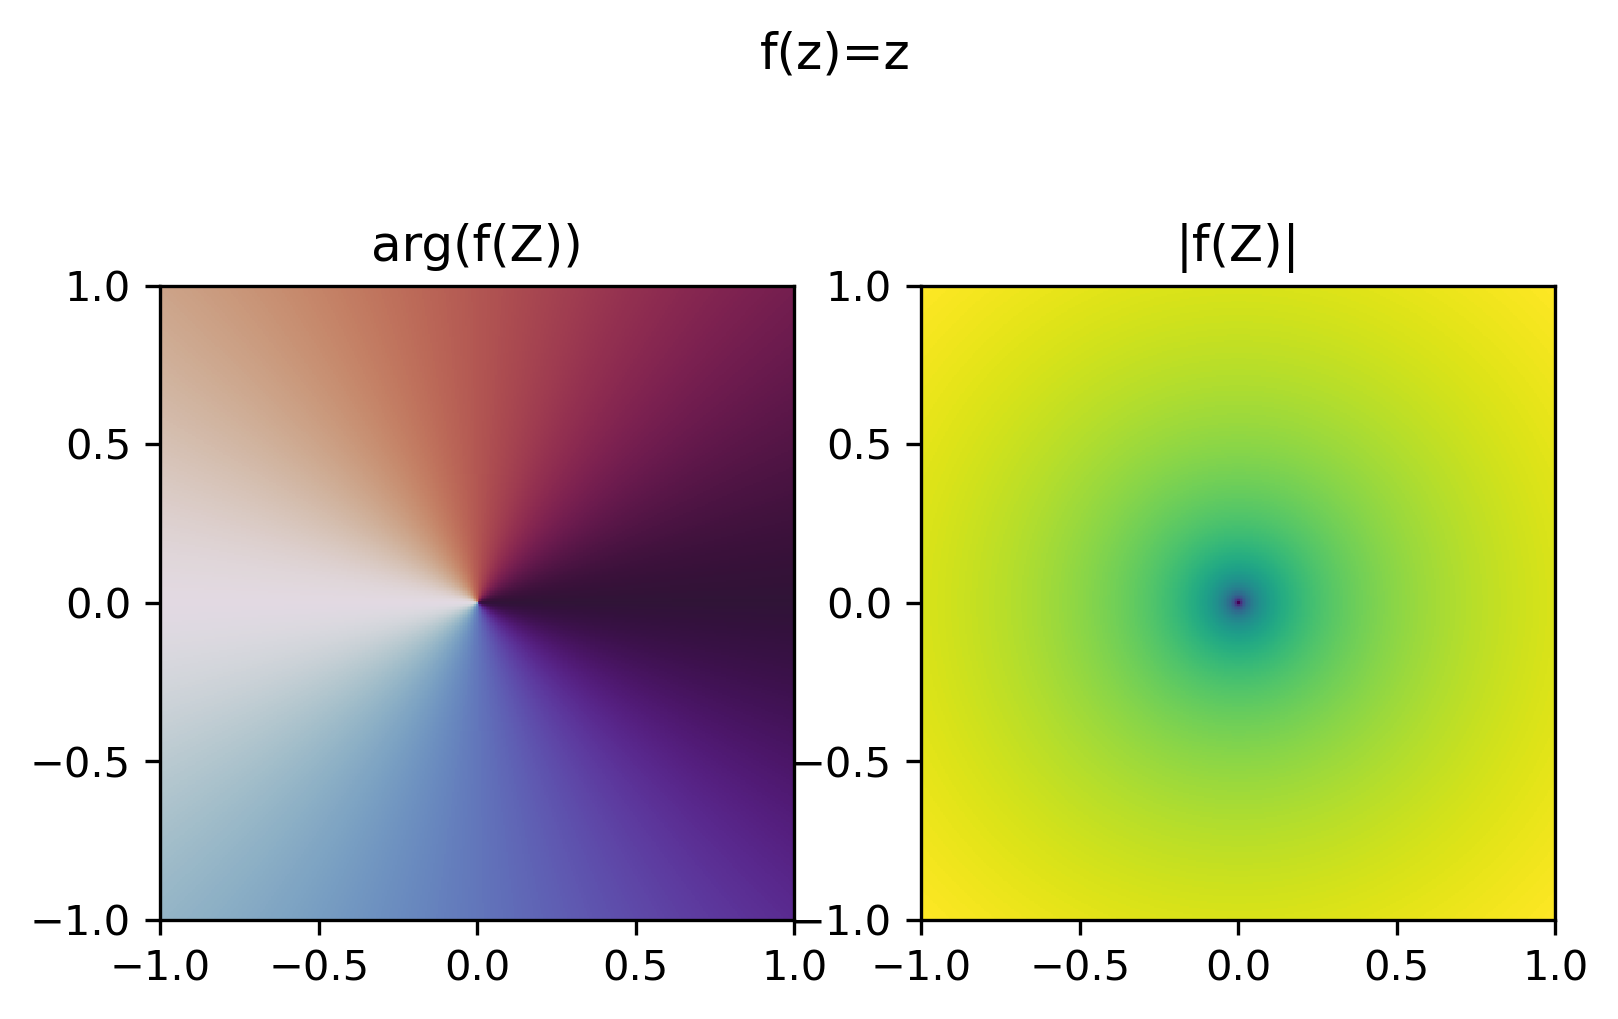

In [27]:
fx = lambda z: np.sqrt(z**2 + 1)
plot_complex(fx, window=[-3, 3, -3, 3], title=r'$f(z) = \sqrt{z^2 + 1}$')

fx = lambda z: z
plot_complex(fx, title='f(z)=z')

### Problem 2

Plot the following functions on $\{x+iy \mid x \in [-1,1],\; y \in [-1,1]\}$.

- $f(z) = z^n$ for $n=2,3,4$.
- $f(z) = z^3 - iz^4 - 3z^6$.

What does a zero of $f(z)$ look like in these plots?

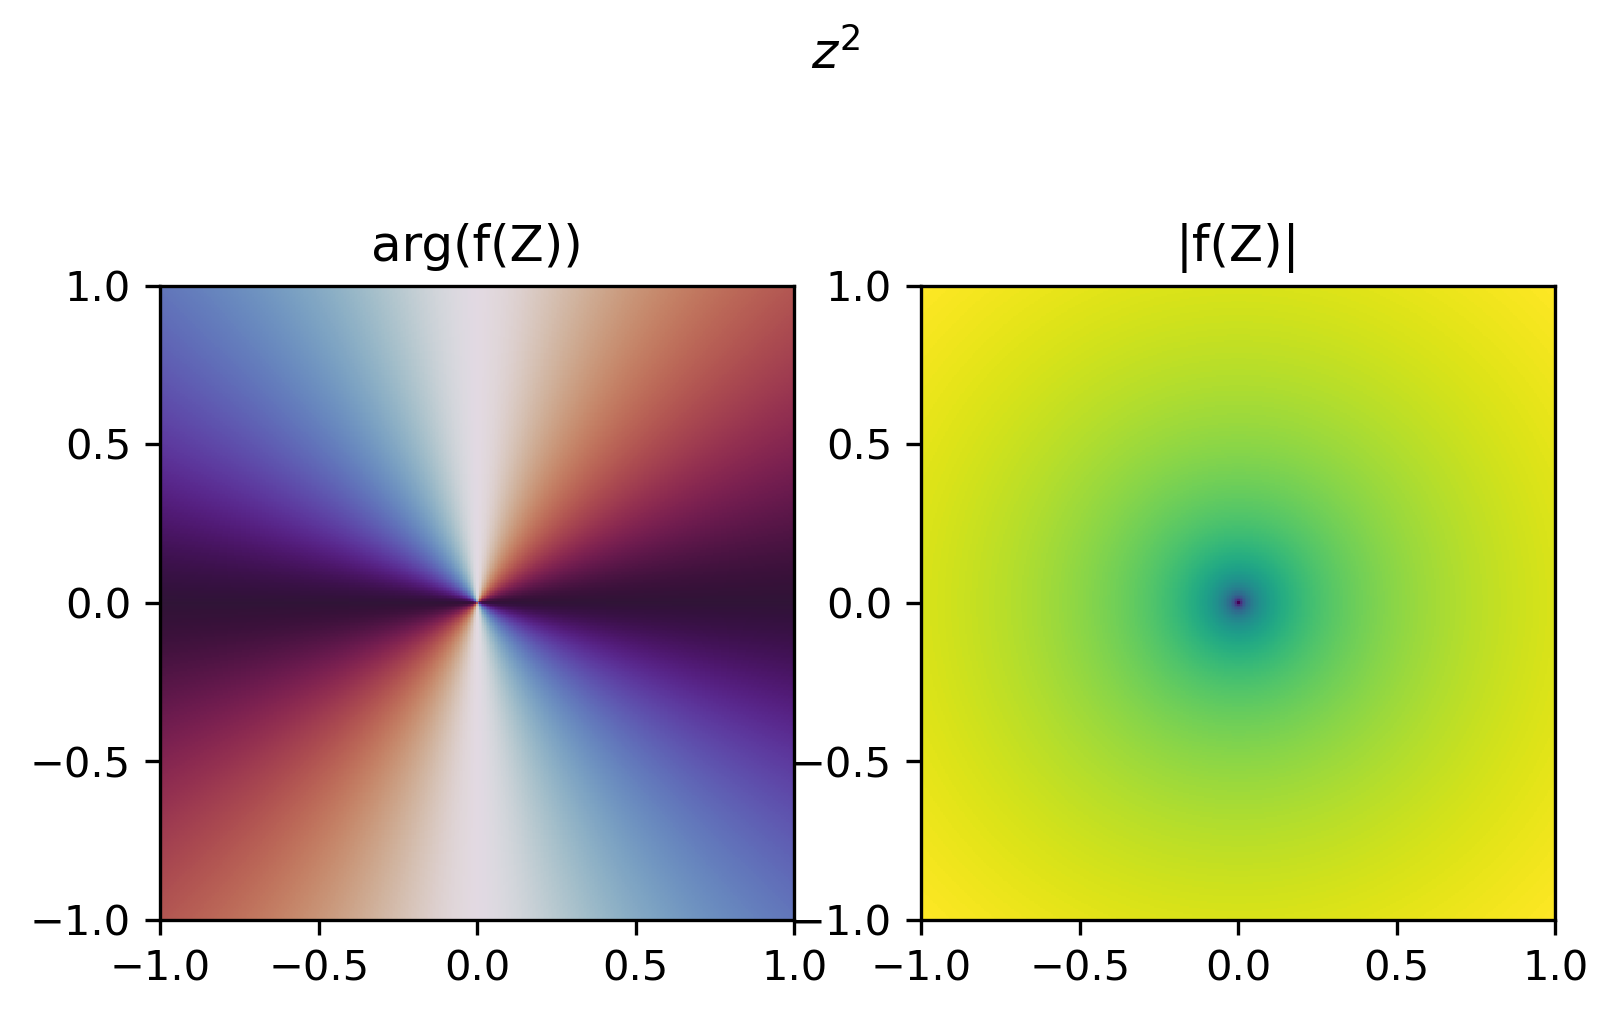

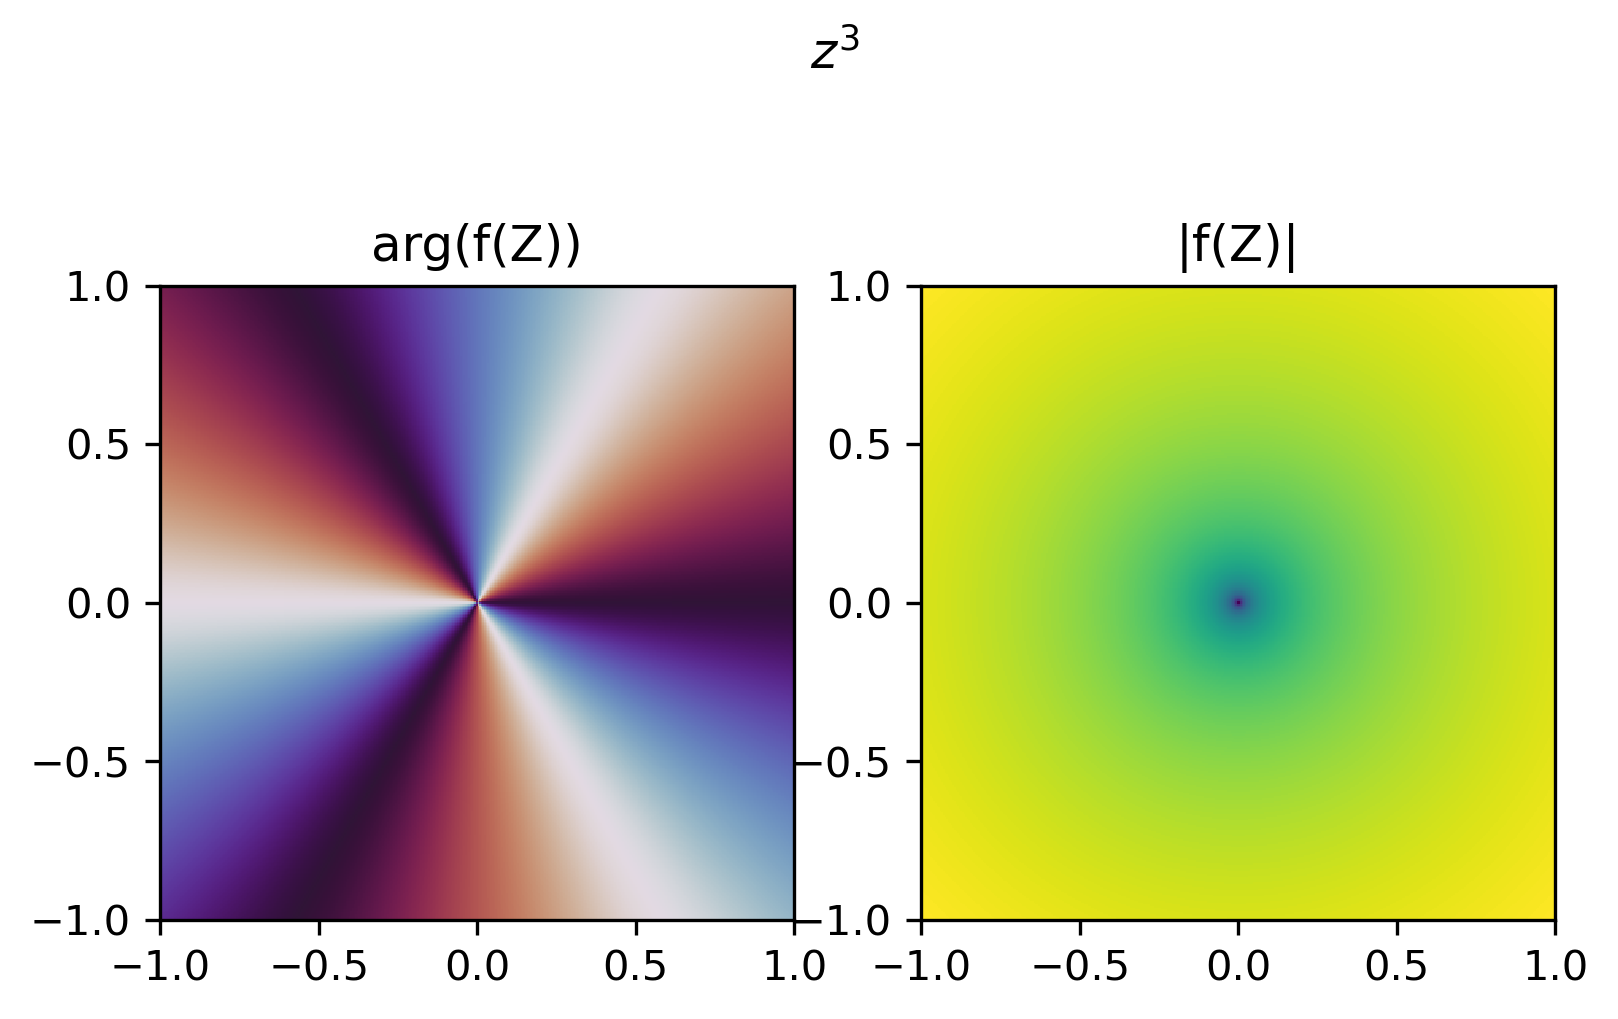

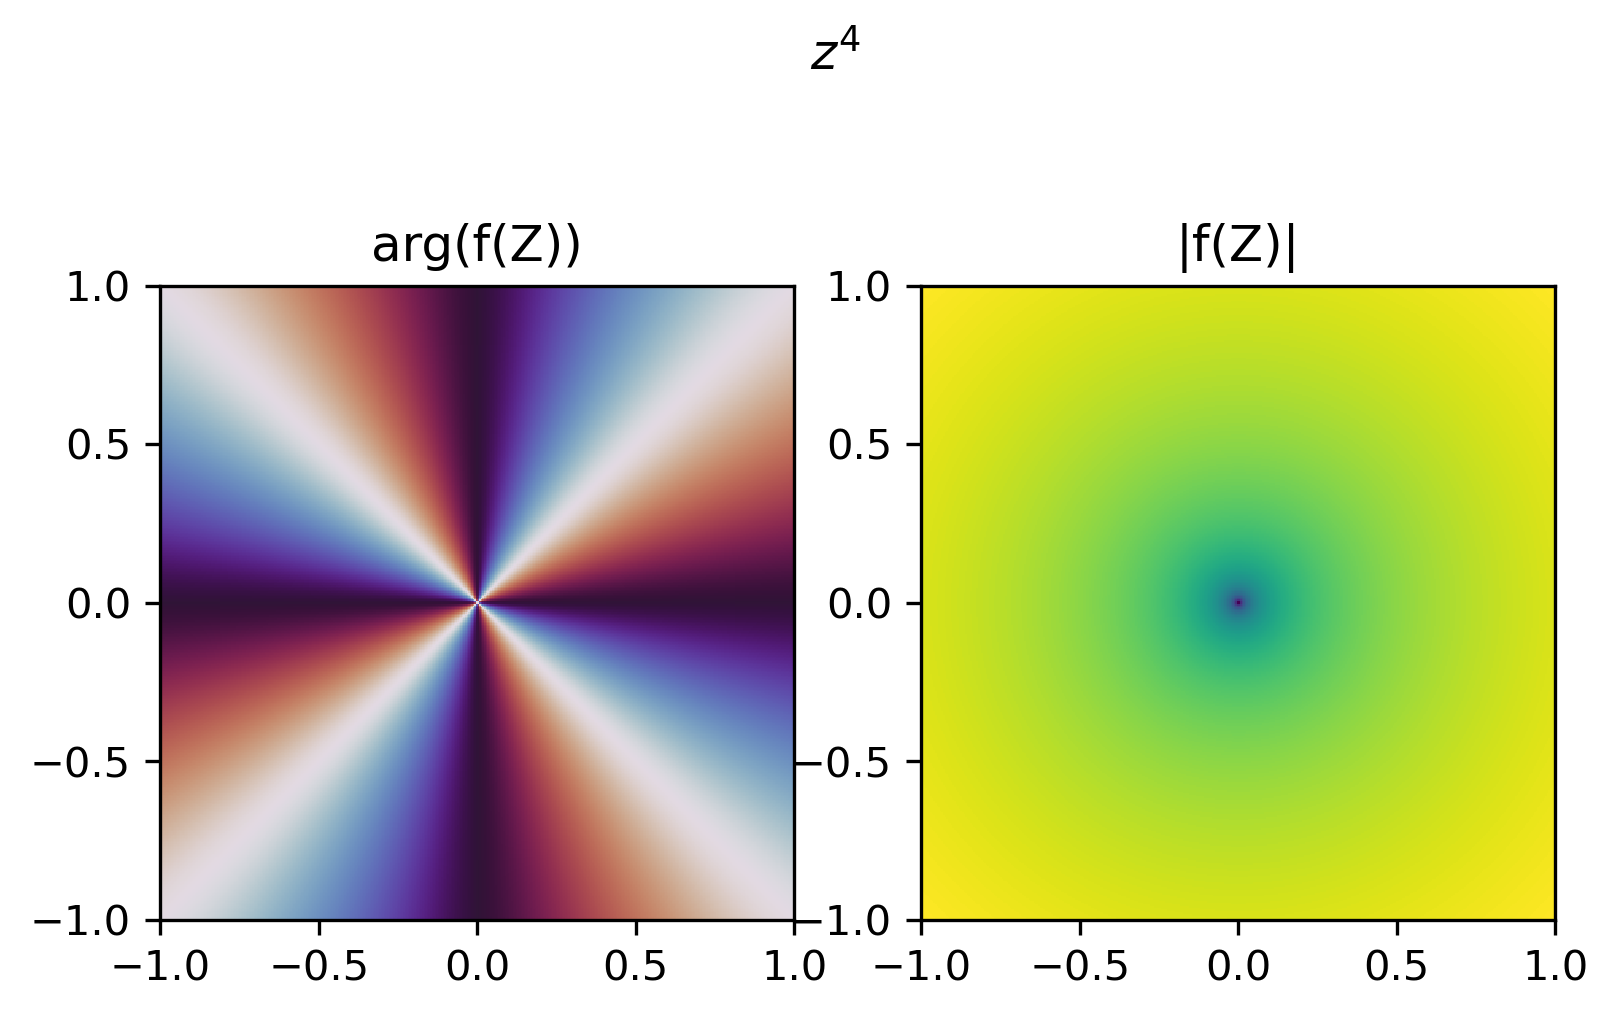

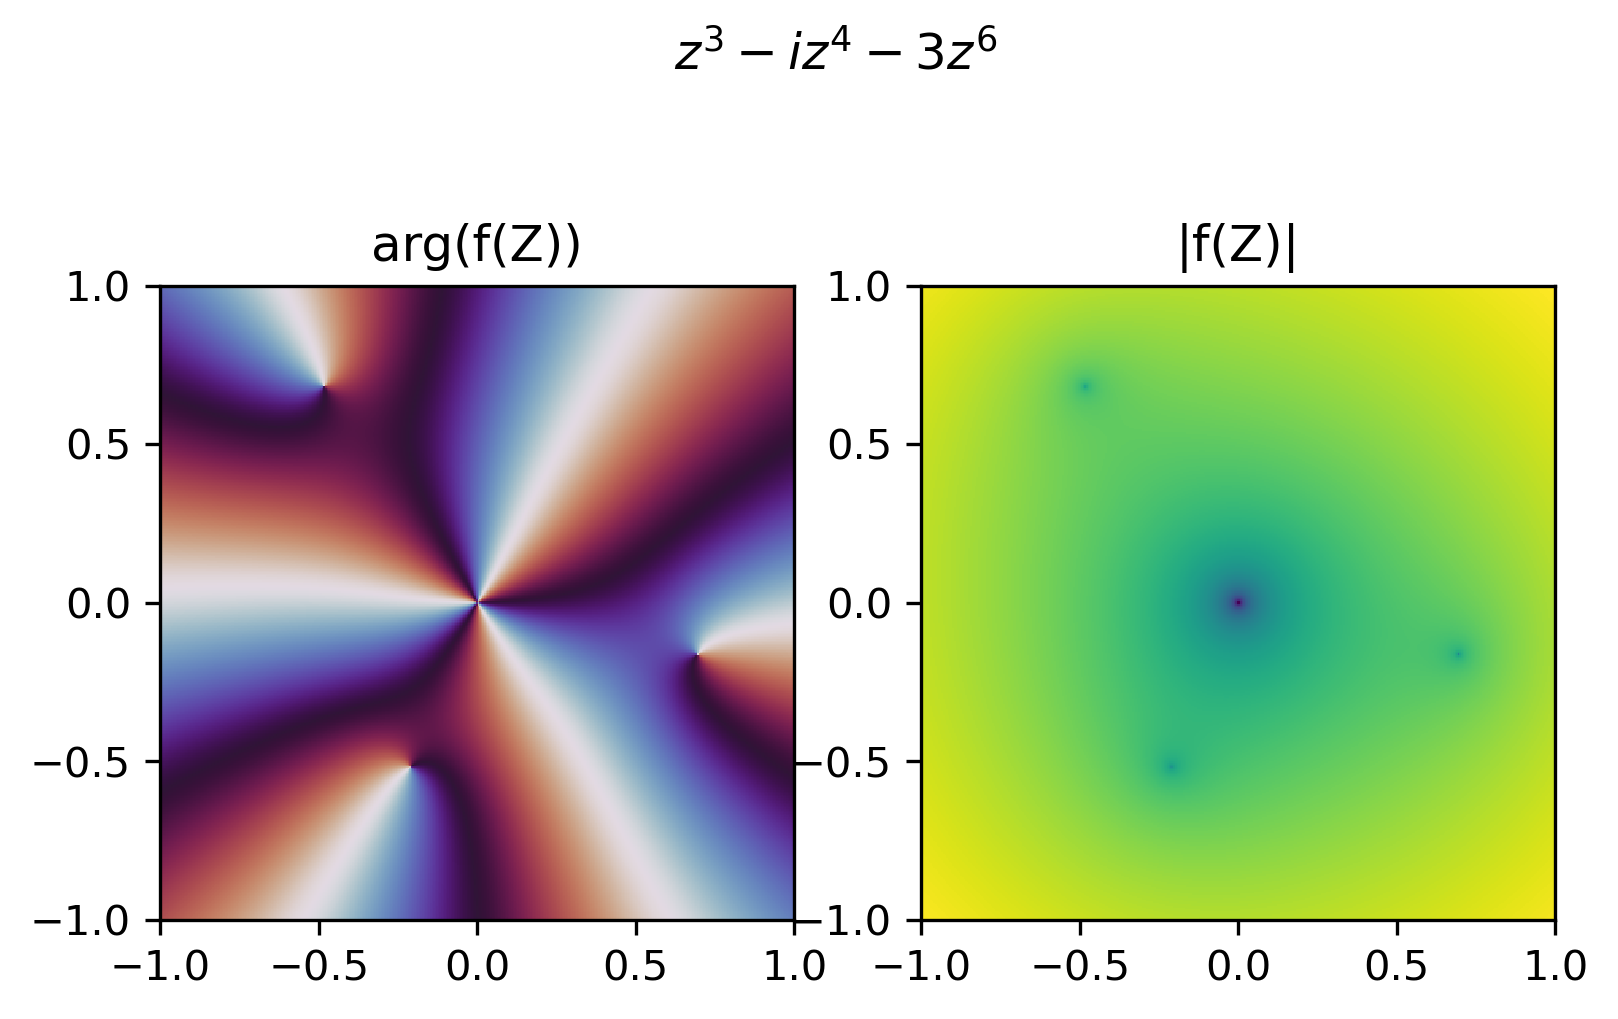

In [29]:
for n in range(2, 5):
    plot_complex(lambda z: z**n, title=r'$z^' + str(n) + '$')

plot_complex(lambda z: z**3 - 1j*z**4 - 3*z**6, title=r"$z^3-iz^4 -3z^6$")

Answer: The positions of the zeros are clearly shown in the magnitude plots. But as we can see, the angle plots also show position but multiplicity as well. Consider the function $z^3$ we know $0$ is a root with multiplicity $3$. The angle plot for $z^3$ has 3 "stripes" so to speak of each color running to the root in a cycle. Likewise for $z^2$ there are two stripes running to the $0$ and for $z^4$ there are 4 all in cycles. In additon, when a function has multiple roots (meaning different valued roots) such as in the function $z^3 - iz^4 - 3z^6$ the roots with higher multiplicities show up as darker in the magnitude plots. 

### Problem 3

Plot the following functions on domains that show all of the zeros and poles.

- $f(z) = z^{-n}$ for $n=1,2,3$.
- $f(z) = z^2 + iz^{-1} + z^{-3}$.

What does a pole of $f(z)$ look like in these plots?

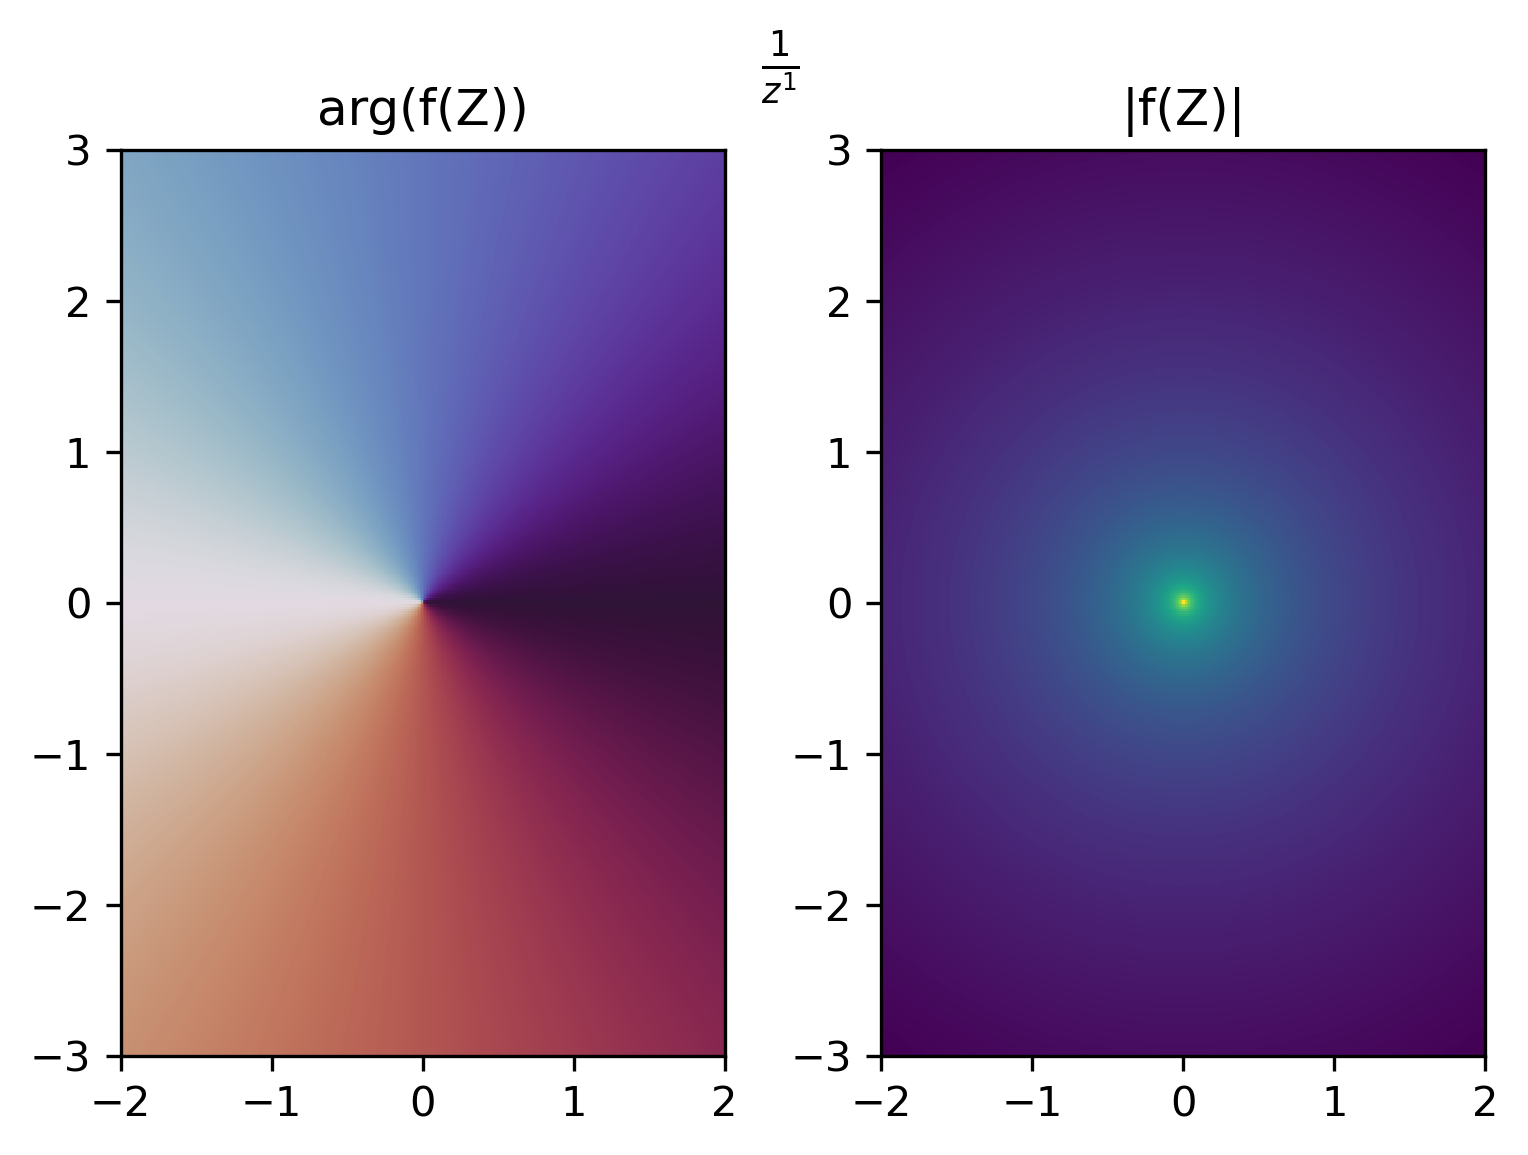

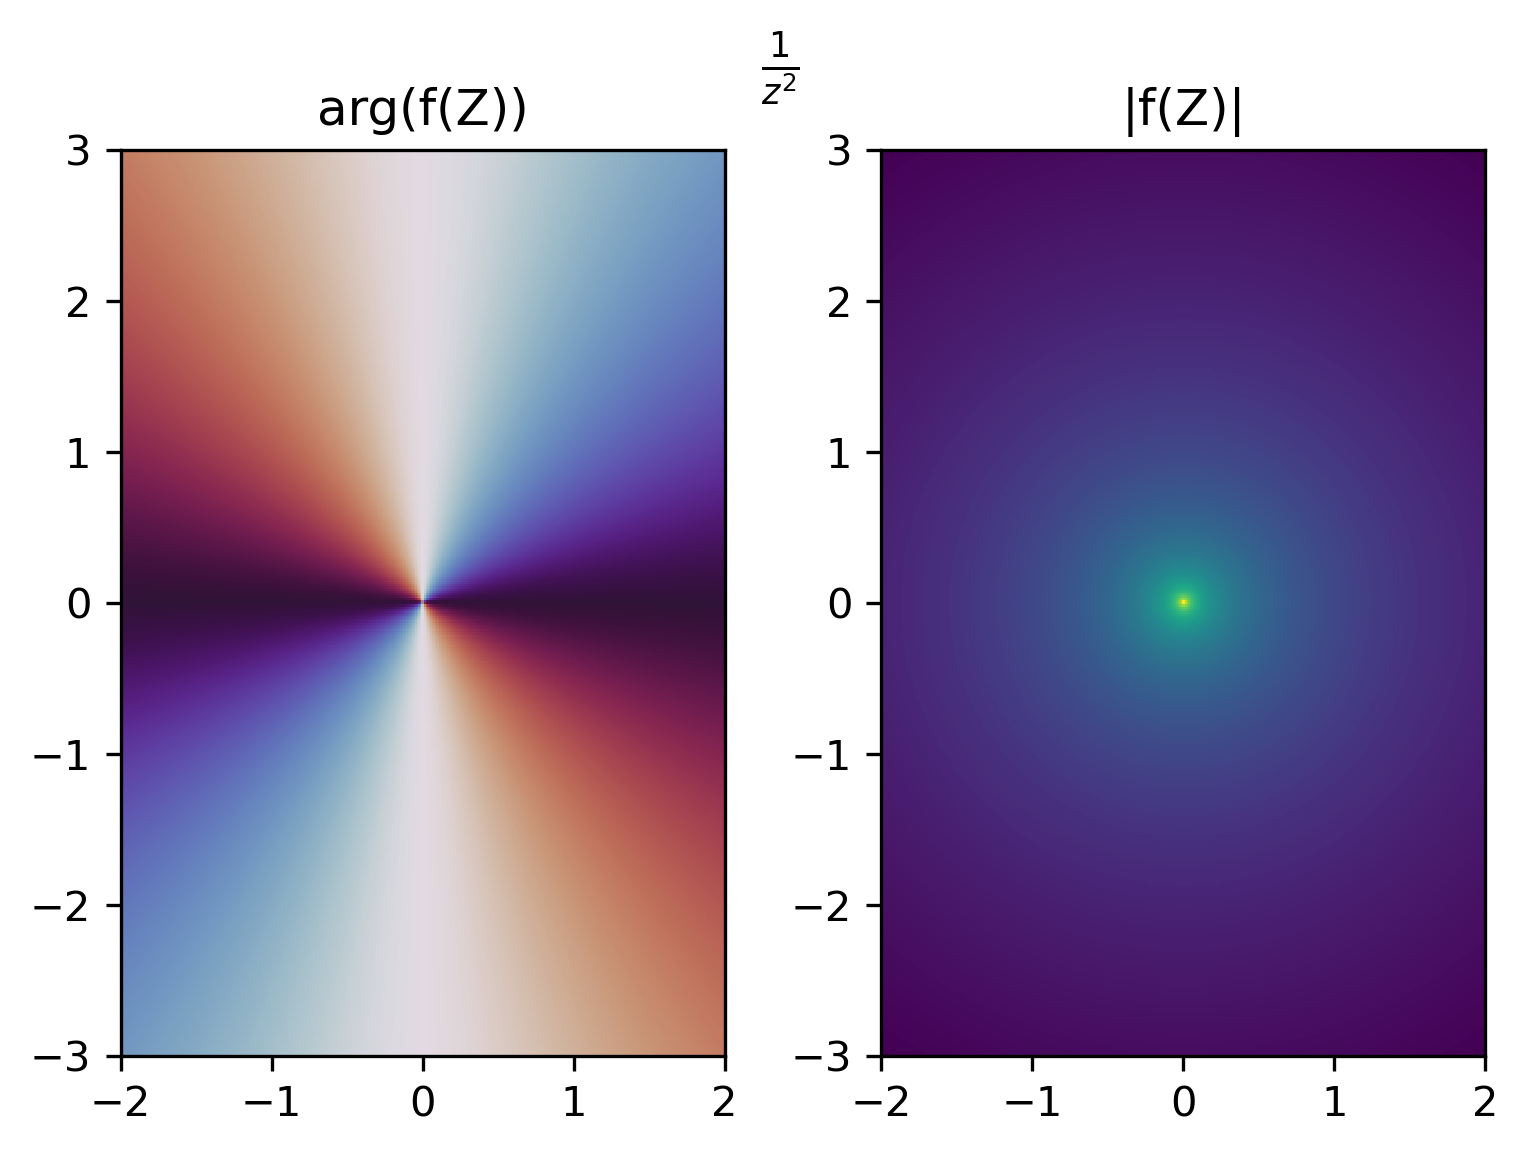

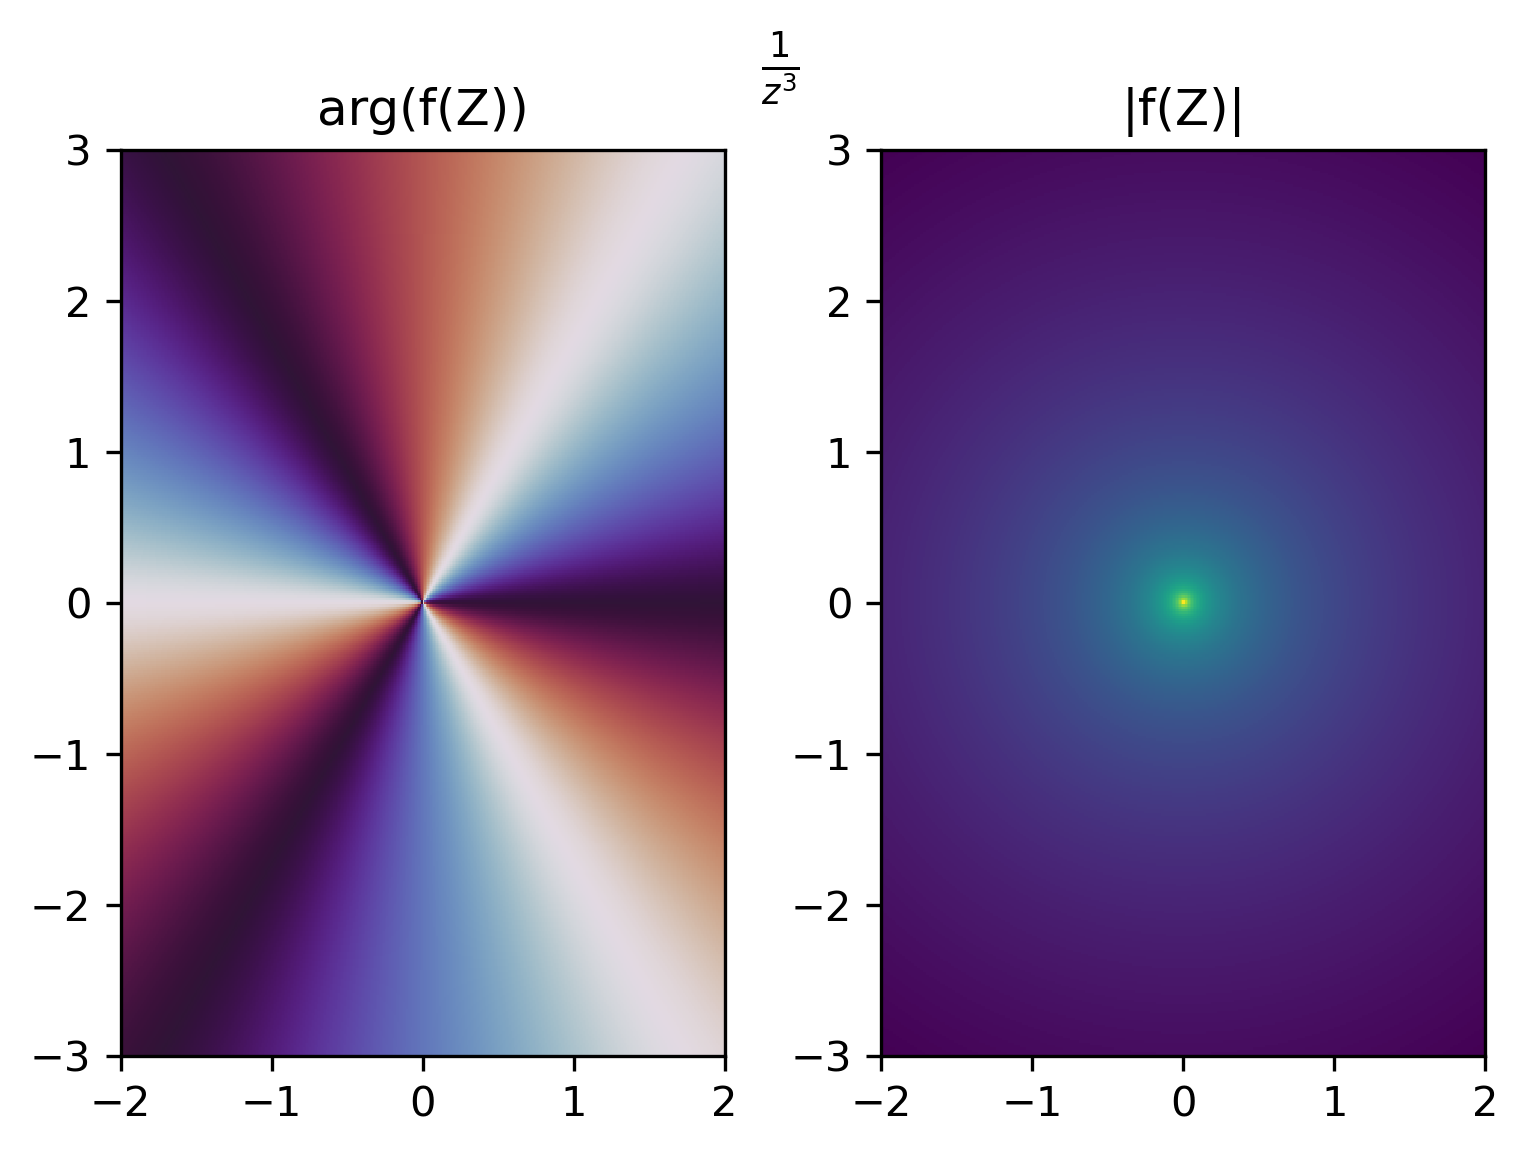

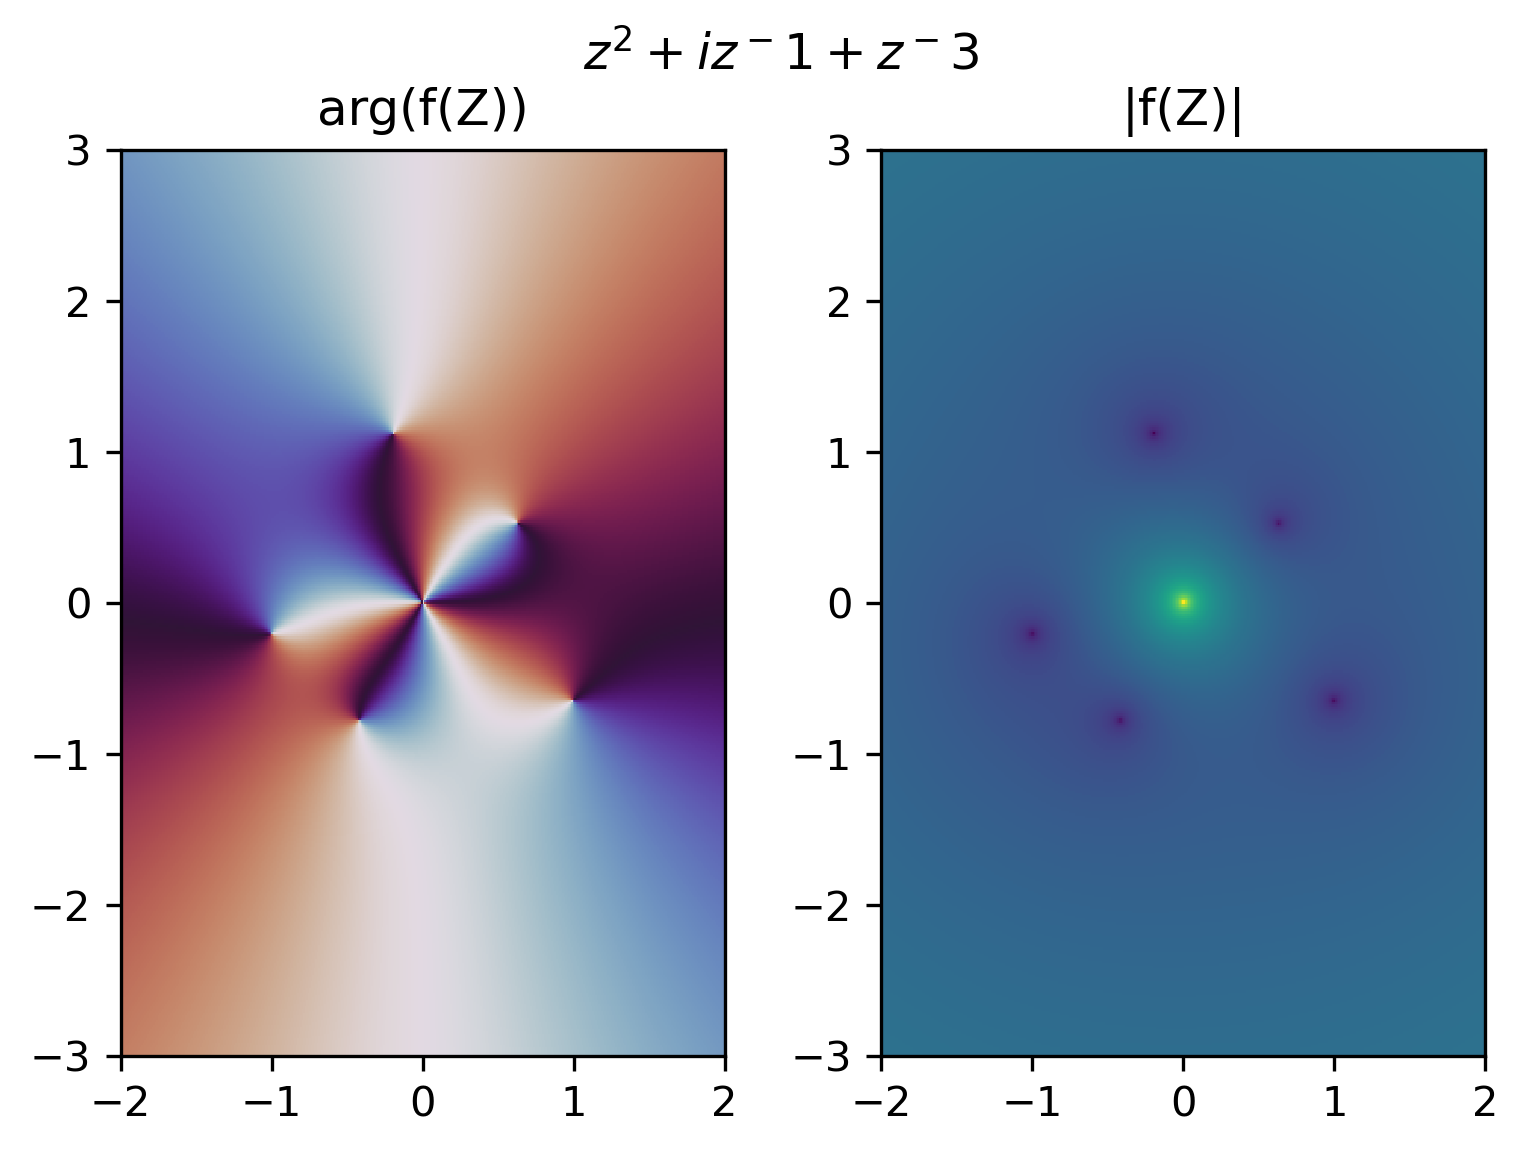

In [32]:
for n in range(1, 4):
    plot_complex(lambda z: 1 / z**n,window=[-2, 2, -3, 3], title=r'$\frac{1}{z^' + str(n) + '}$')
plot_complex(lambda z: z**2 + 1j/z + 1/z**3,window=[-2, 2, -3, 3], title=r'$z^2 + iz^-1 + z^-3$')

Answer: The pole is the light green dot that apperas on the magnetude plot whearas on the angle plot each root "connects" so to speak to the pole. 

### Problem 4

Plot the following functions and estimate the number and order of their zeros and poles.
Adjust the bounds of the plots until you have found all zeros and poles.

- $f(z) = -4z^5 + 2z^4 - 2z^3 - 4z^2 + 4z - 4$
- $f(z) = z^7 +6z^6 −131z^5 −419z^4 +4906z^3 −131z^2 −420z+4900$
- $f(z) = \frac{16z^4 + 32z^3 + 32z^2 + 16z + 4}{16z^4 - 16z^3 + 5z^2}$

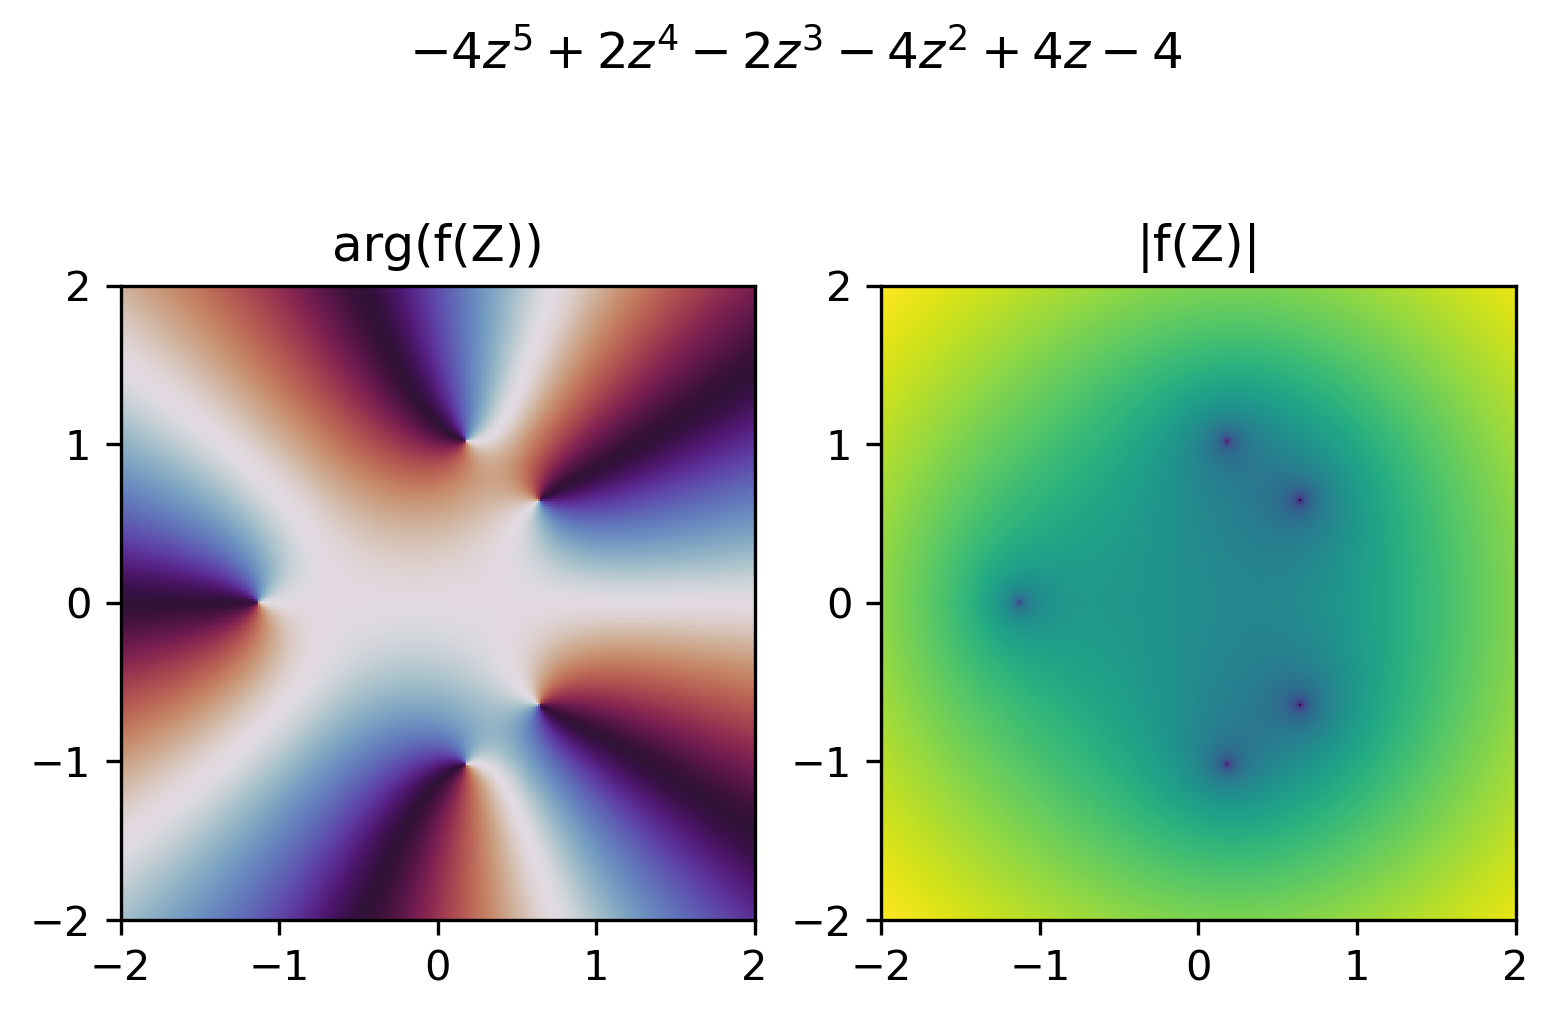

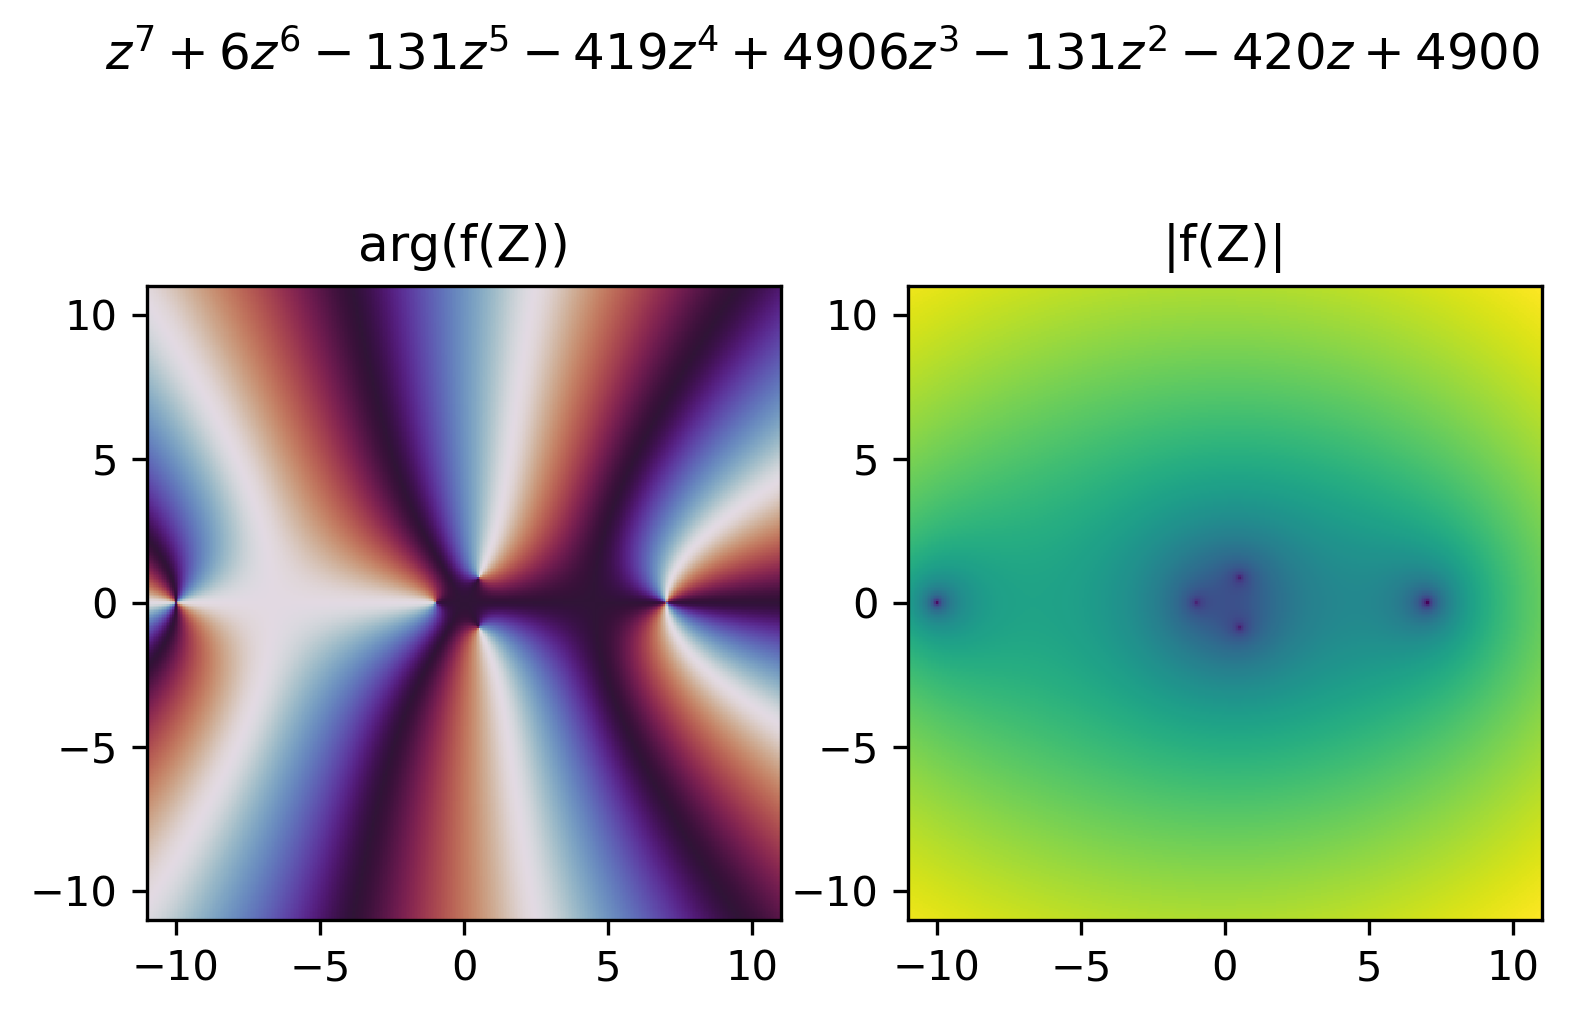

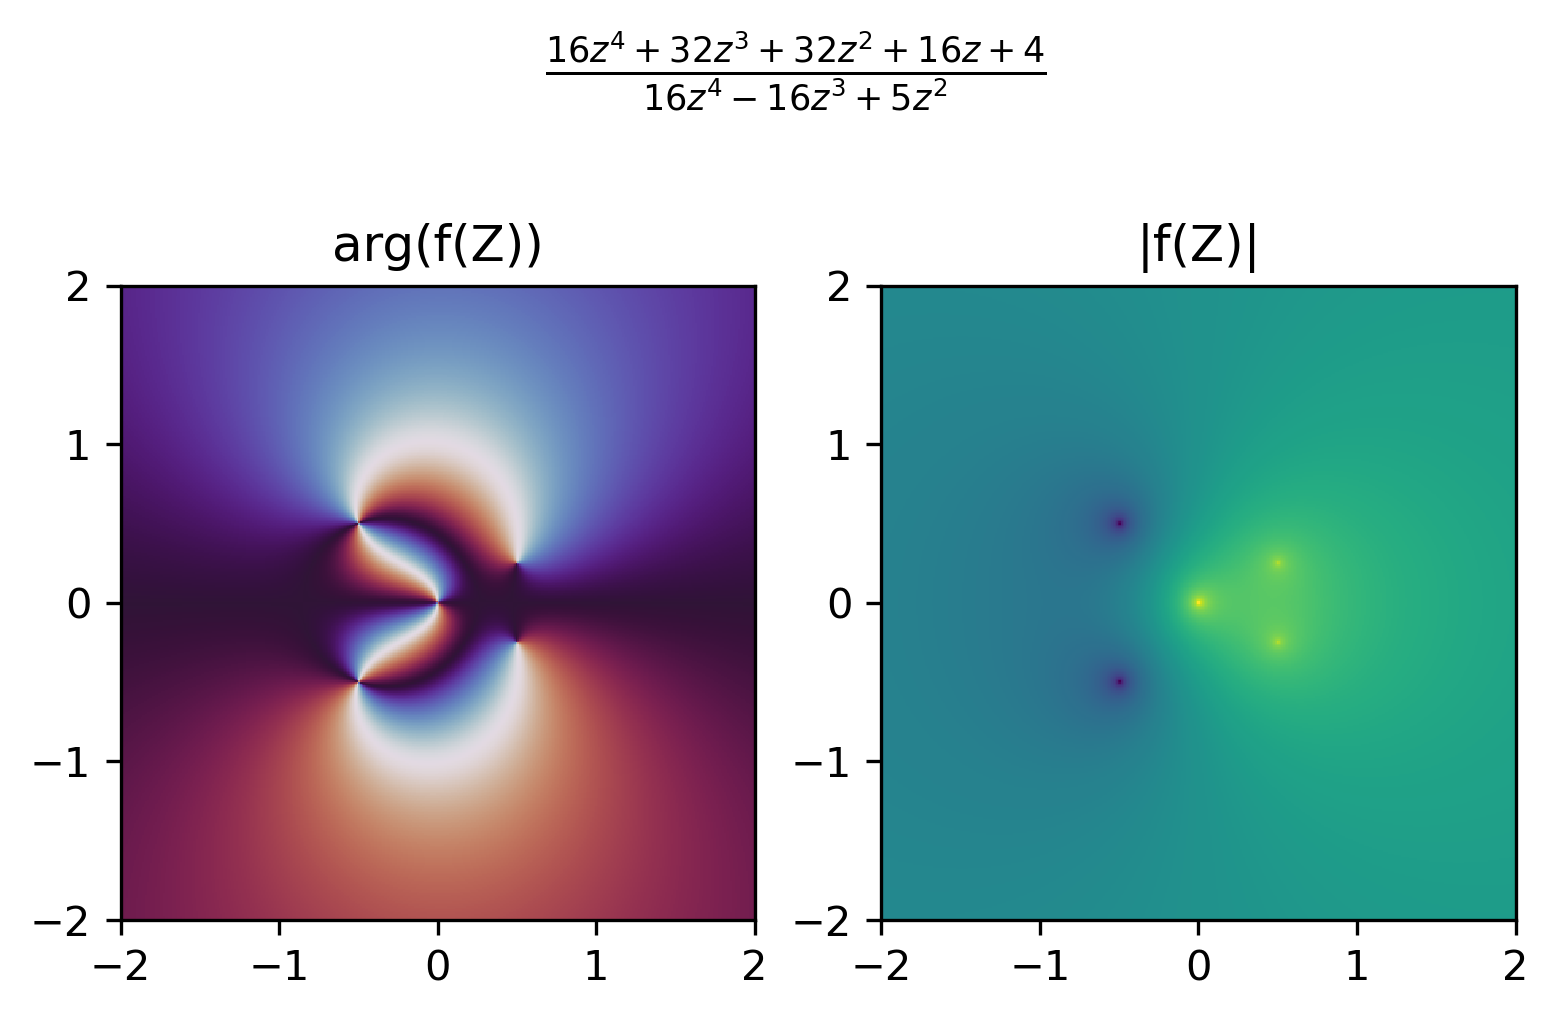

In [35]:
plot_complex(lambda z: -4*z**5 +2*z**4 -2*z**3 - 4*z**2 + 4*z -4, window=[-2, 2, -2, 2], title=r'$-4z^5 + 2z^4 - 2z^3 - 4z^2 + 4z-4$')
plot_complex(lambda z: z**7 + 6*z**6 - 131*z**5 - 419*z**4 + 4906*z**3 - 131*z**2 - 420*z + 4900, window=[-11, 11, -11, 11], title=r'$ z^7 + 6z^6 - 131z^5 - 419z^4 + 4906 z^3 -131z^2 -420z + 4900$')
plot_complex(lambda z: (16*z**4 + 32*z**3 + 32*z**2+16*z + 4) / (16*z**4 - 16*z**3 + 5*z**2), window=[-2, 2, -2, 2], title=r'$\frac{16z^4 + 32z^3 + 32z^2 + 16z+4}{16z^4 - 16z^3 + 5z^2}$')



Answers: The function $-4z^5 + 2z^4 -2z^3 -4z^2 + 4z -4$ has $5$ zeros and $0$ poles.

The function $z^7+6z^6-131z^5-419z^4+4906z^3-131z^2-420z+4900$ has 3 roots with multiplicites of 1 and 2 zeros with multiplicities of 2 and no poles.  

The function $f(z) = \frac{16z^4 + 32z^3 + 32z^2 + 16z + 4}{16z^4 - 16z^3 + 5z^3}$ has $2$ roots with multiplicity $2$ and $3$ poles. 

### Problem 5

Plot the following functions on the domain $\{x+iy\mid x,y\in[-8,8]\}$.
Explain carefully what each graph reveals about the function and why the function behaves that way.

- $f(z) = e^z$.
- $f(z) = \tan(z)$.

(Hint: use the polar coordinate representation to mathematically examine the magnitude and angle of each function.)

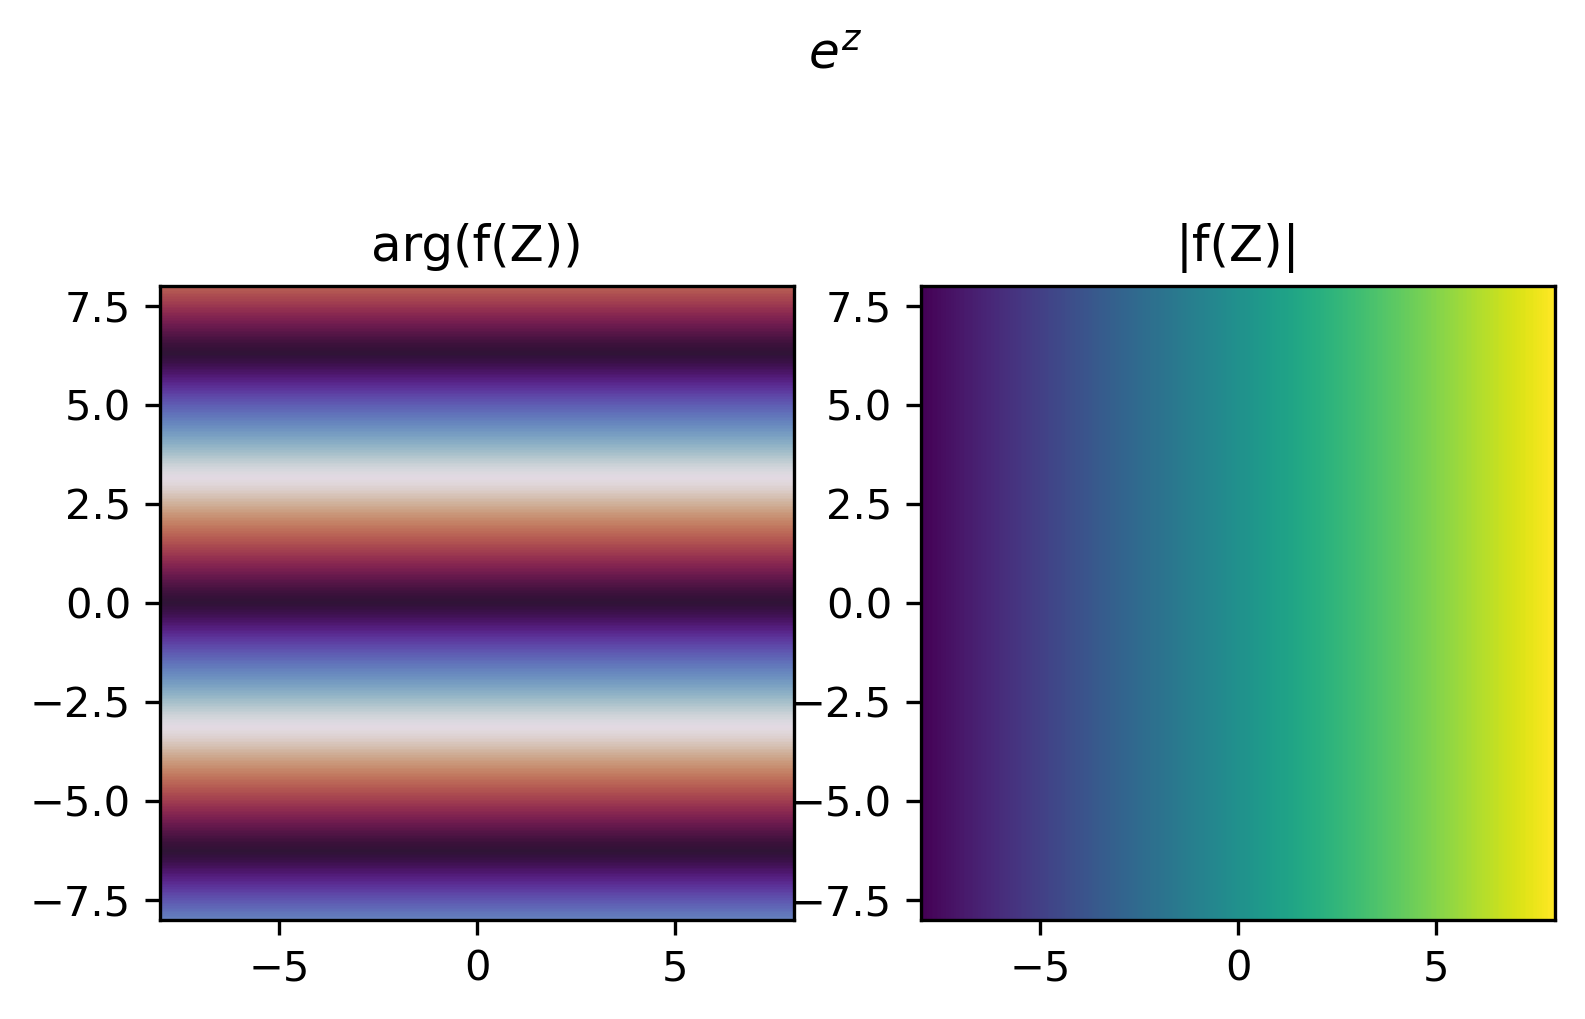

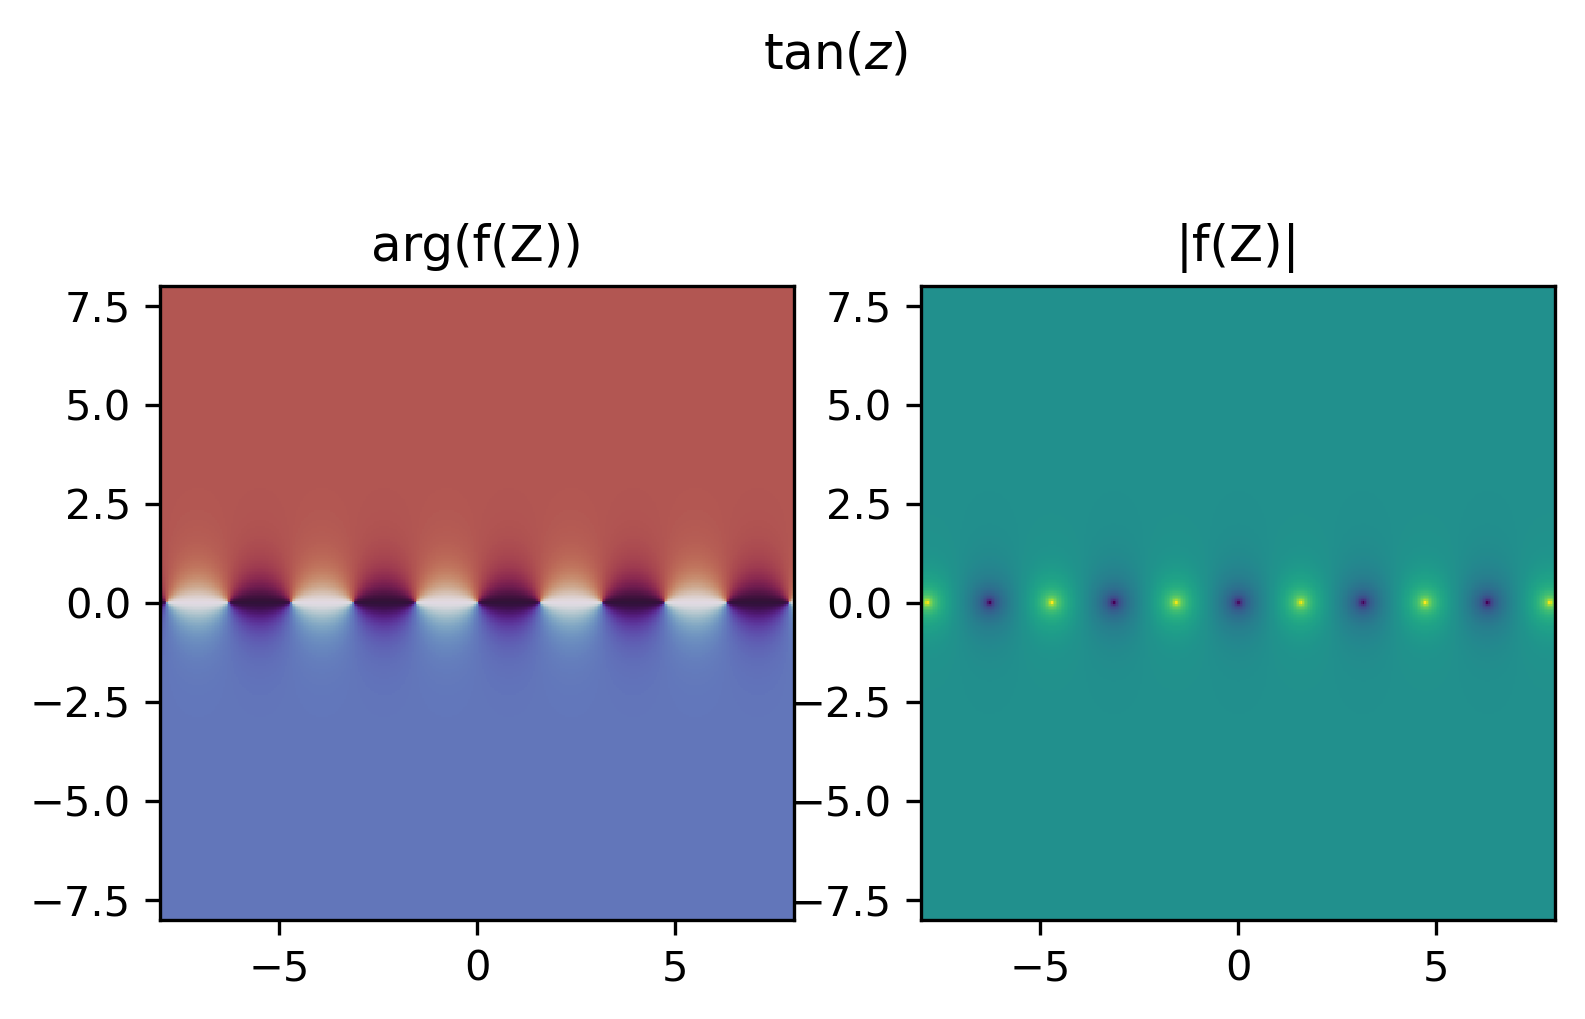

In [38]:
plot_complex(lambda z: np.exp(z), window=[-8, 8, -8, 8], title=r'$e^z$')

plot_complex(lambda z: np.tan(z), window=[-8, 8, -8, 8], title=r'$\tan{(z)}$')


Answers: For the function $e^z$ notice that there are no zeros as we know that the function $e^z$ has no roots, the function also has no poles. notice that much of this behavior can be explained by euler's formula $e^{it} = \cos(t) + i\sin(t)$

The function $\tan(z)$ has infinitely many poles and infinitely many roots this makes sense as you look at the graph of $y = \tan(x)$. Each zero then has multiplicity one and the graph of $\tan$ is undefined at the points $\pi/2 + n\pi$ where $n\in\mathbb{N}$. 

### Problem 6

For each of the following functions, plot the function on the domain $\{x+iy\mid x,y\in[-1,1]\}$ and describe what this view of the plot seems to imply about the function.
Then plot the function on a domain that allows you to see the true nature of the roots and poles and describe how it is different from what the original plot implied.

- $f(z) = 100z^2 + z$
- $f(z) = \sin\left(\frac{1}{100z}\right)$.

(Hint: zoom way in.)

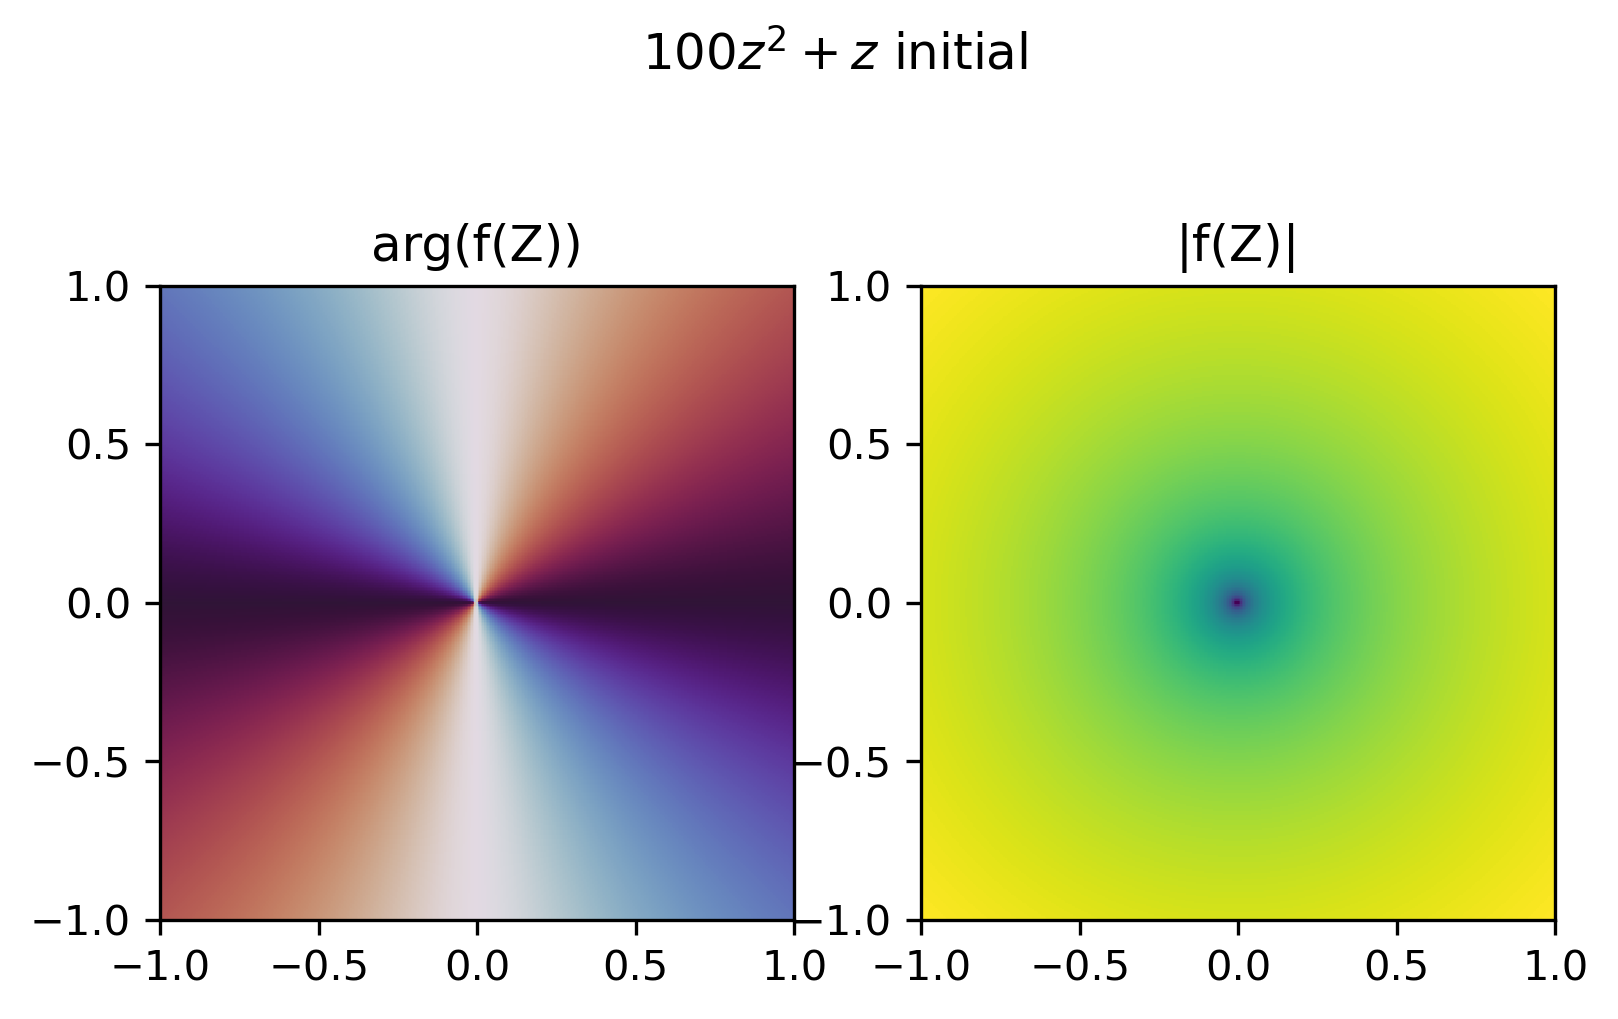

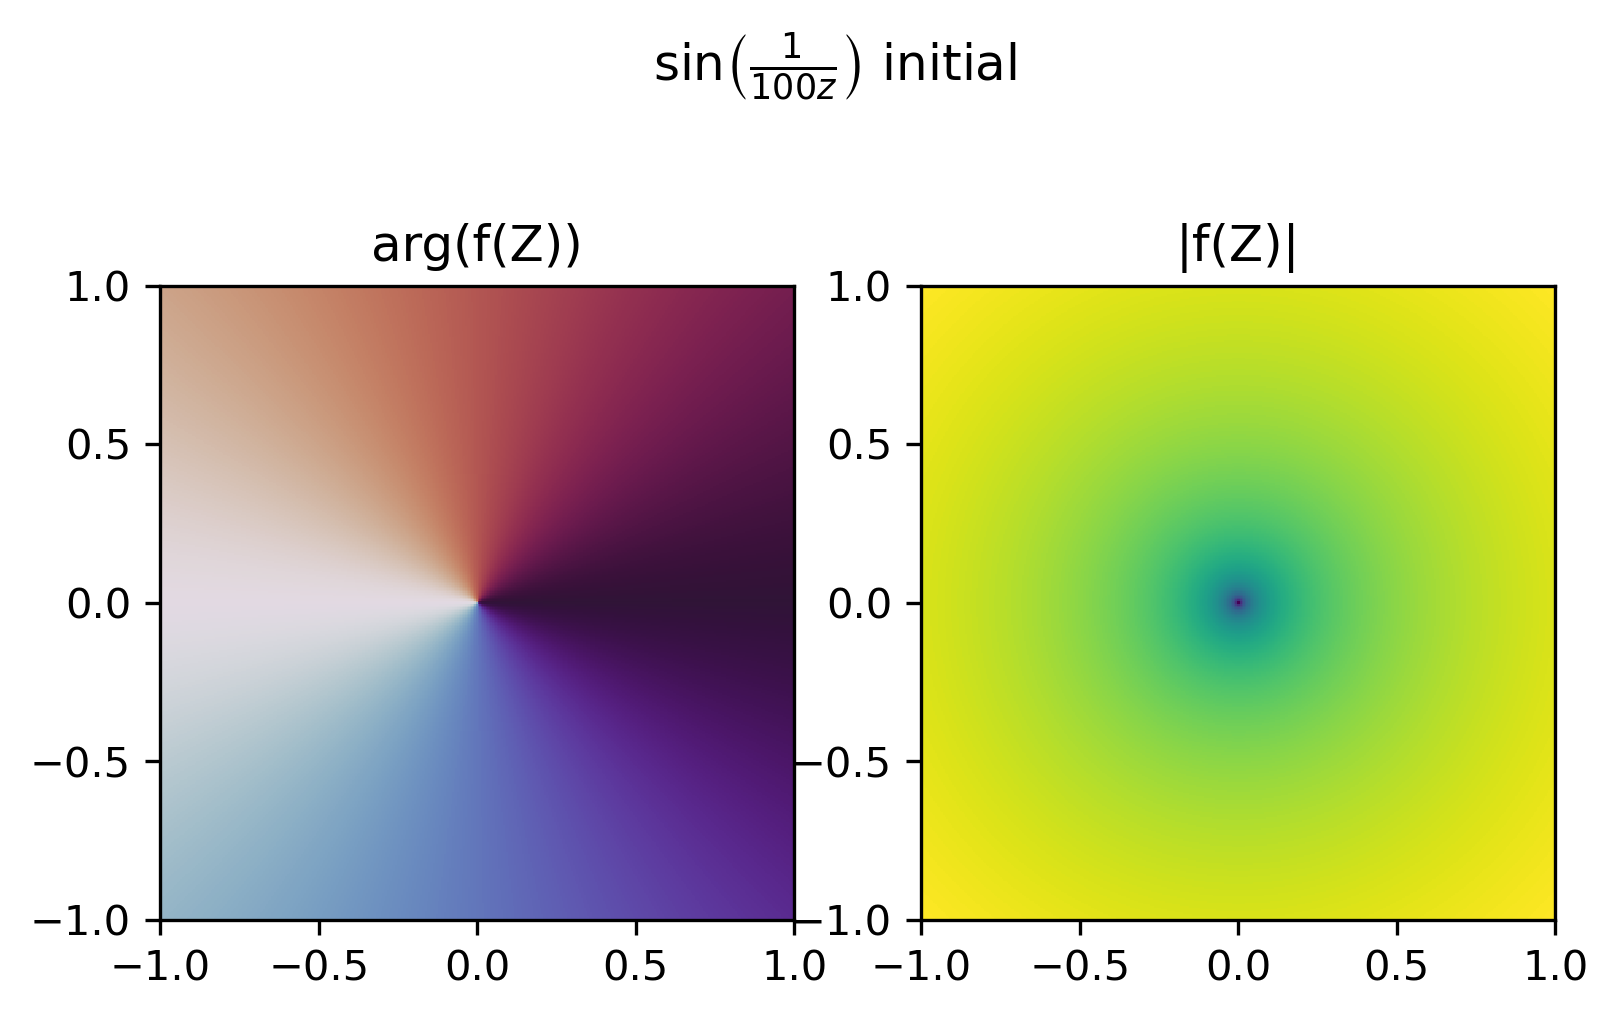

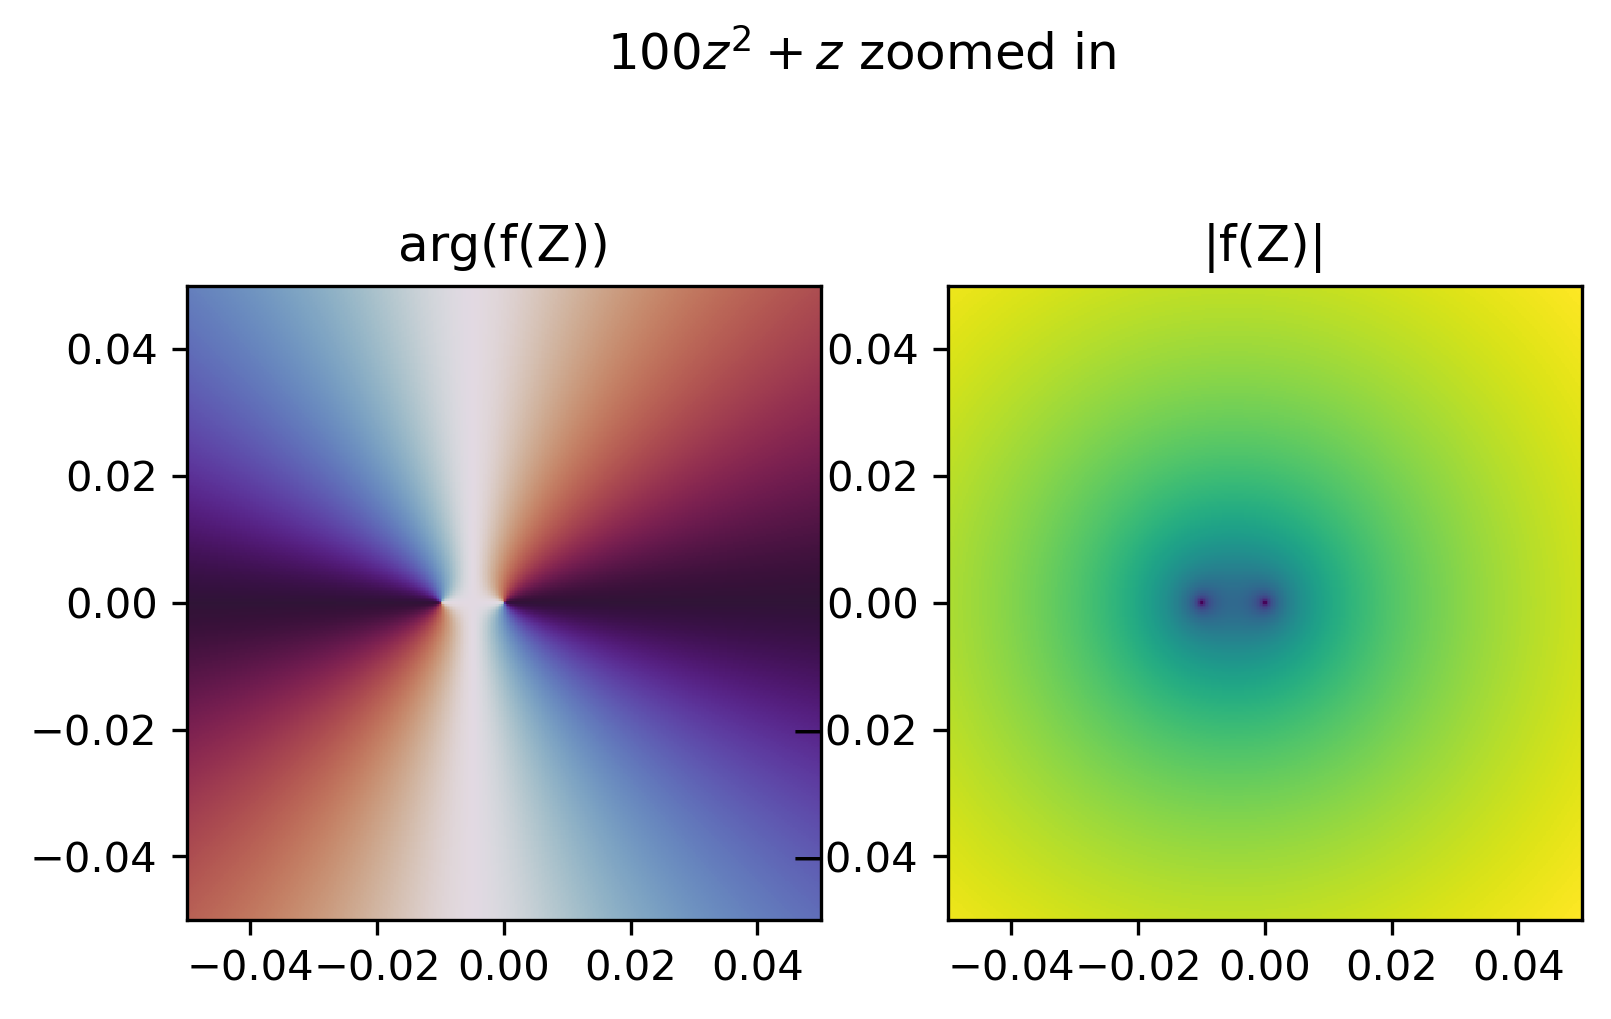

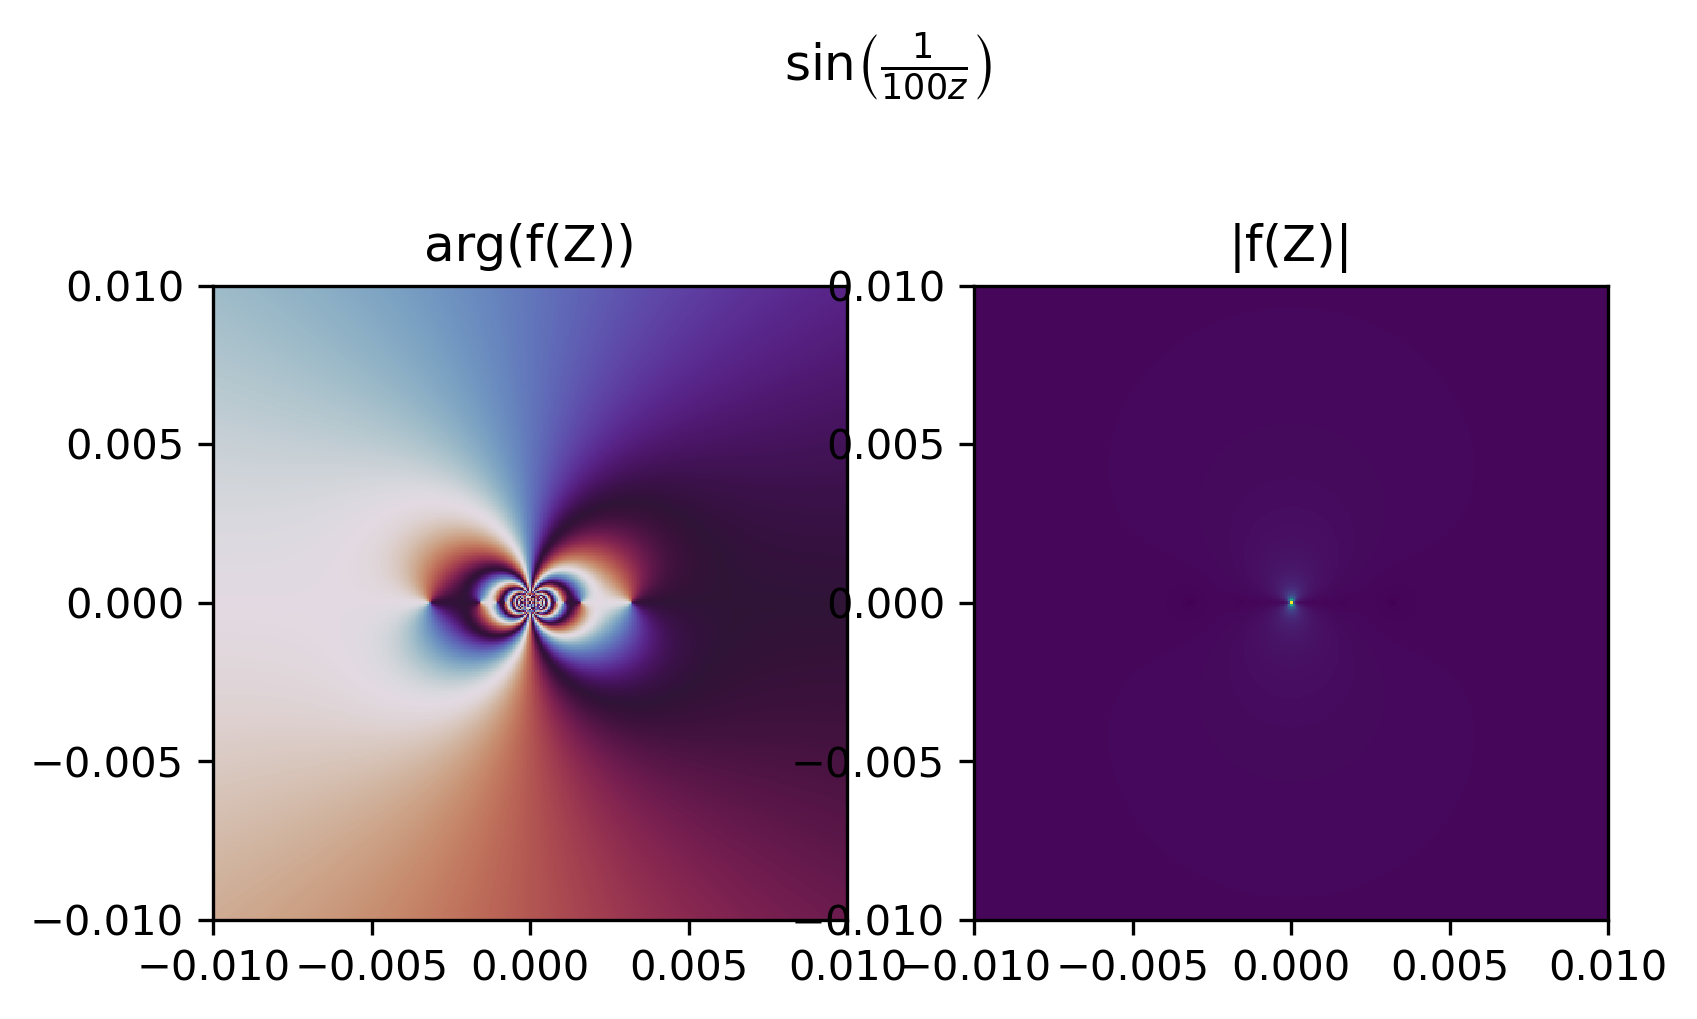

In [48]:
plot_complex(lambda z: 100*z**2 + z, window=[-1, 1, -1, 1], title=r'$100z^2 + z$' + ' initial')
plot_complex(lambda z: np.sin( 1 / 100*z), window=[-1, 1, -1, 1], title=r'$\sin{\left(\frac{1}{100z}\right)}$' + ' initial')

plot_complex(lambda z: 100*z**2 + z, window=[-0.05, 0.05, -0.05, 0.05], title=r'$100z^2 + z$' + ' zoomed in')
plot_complex(lambda z: np.sin( 1 / (100*z)), window=[-0.01, 0.01, -0.01, 0.01], title=r'$\sin{\left(\frac{1}{100z}\right)}$')


Answers: Both the intial graph of $f_1 = 100z^2 + z$ and $f_2 =\sin(1/100z)$ seemed to imply that they both only had one root and no poles. However when you zoomed it it was clear that the function $f_1$ clearly had $2$ roots and not poles and the function $f_2$ has one pole at the origin and infinitely many zeros on the real line. 